<a href="https://colab.research.google.com/github/ghatanisuresh/DataScience_tutorial/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction

Some of the important aspect of data science is to find out what data can tell us about the future. '

* Some of examples:
- What do data about climate and pollution say about tempreatures a few decades from now?
- Which websites are likely to interest the person, on the basis of his/her internet profile?
- How can a patients' medical history be used to judge how well he or she will respond to a treatment?

To answers such questions, __prediction__ is helpful.



# Linear regression

For the prediction, one of the algorithm to predict the outcome is with using 'linear regression'.



Let's taken below example of predicting birthweigth

* Data on birthweigth of babies via Sheffield University.
* Details of mother and father: eg. height, weight, smoking status
* details of baby: birthweight, length, head circumference

Question?

* Can we predict baby measures from parents?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

birth = pd.read_csv('/content/drive/MyDrive/MQ/First Session/Data Science/files/birthweight_reduced.csv')
birth.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [7]:
birth.shape

(42, 17)

In [11]:
birth.isnull().sum()

,0
id,0
headcirumference,0
length,0
Birthweight,0
Gestation,0
smoker,0
motherage,0
mnocig,0
mheight,0
mppwt,0


In [12]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                42 non-null     int64  
 1   headcirumference  42 non-null     int64  
 2   length            42 non-null     int64  
 3   Birthweight       42 non-null     float64
 4   Gestation         42 non-null     int64  
 5   smoker            42 non-null     int64  
 6   motherage         42 non-null     int64  
 7   mnocig            42 non-null     int64  
 8   mheight           42 non-null     int64  
 9   mppwt             42 non-null     int64  
 10  fage              42 non-null     int64  
 11  fedyrs            42 non-null     int64  
 12  fnocig            42 non-null     int64  
 13  fheight           42 non-null     int64  
 14  lowbwt            42 non-null     int64  
 15  mage35            42 non-null     int64  
 16  LowBirthWeight    42 non-null     object 
dtyp

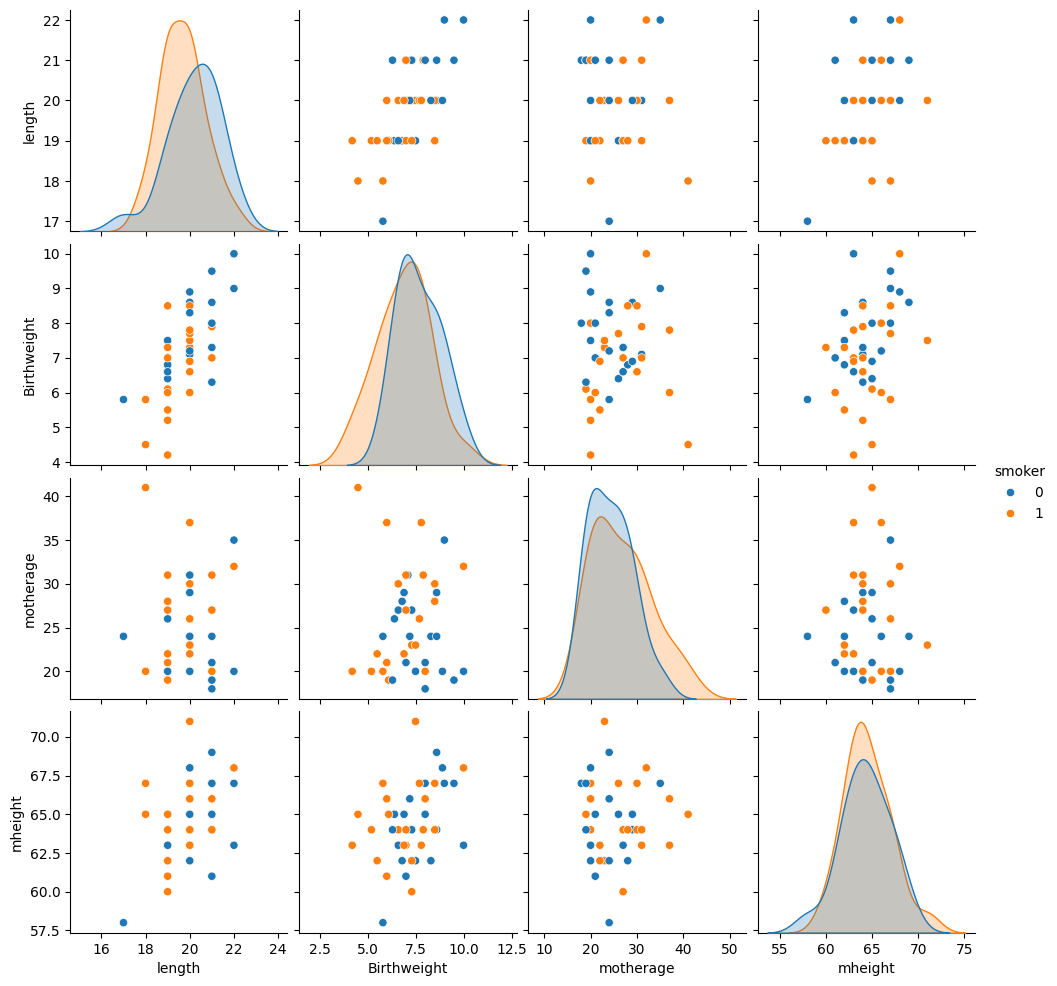

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


p = sns.pairplot(birth[['length', 'Birthweight','smoker','motherage','mheight']], hue = 'smoker')

This plot is a **pairplot**, which is a grid of scatterplots and distribution plots for pairs of variables. It helps visualize the relationship between different pairs of features. In this case, the plot shows how various features (such as length, birthweight, mother’s age, and mother’s height) relate to each other, with a distinction between mothers who smoke and those who do not.

### Components of the Plot:

- **Variables in the pairplot**:
  - **length**: The length of the newborn.
  - **Birthweight**: The birthweight of the newborn.
  - **motherage**: The age of the mother.
  - **mheight**: The height of the mother.

- **Color-coded by the smoker column**:
  - **Blue dots (0)** represent data points where the mother **did not smoke** during pregnancy.
  - **Orange dots (1)** represent data points where the mother **smoked** during pregnancy.

### Key Observations:

1. **Diagonal Plots (Distribution Plots)**:
   - Along the diagonal, we see **KDE plots (Kernel Density Estimation)** or **histograms**, which show the distribution of each variable for smokers (orange) and non-smokers (blue).
     - For example:
       - The **length** distribution for newborns is relatively similar for smokers and non-smokers, though smokers seem to have slightly shorter newborns.
       - The **Birthweight** distribution shows a slightly wider spread for non-smokers, indicating a difference in birthweight between the two groups.
       - The distribution of **motherage** shows a higher concentration of younger mothers in the dataset.
       - **mheight** distributions for mothers who smoked and did not smoke seem similar.

2. **Scatter Plots**:
   - Each off-diagonal plot represents a **scatter plot** between two variables. The dots are color-coded by the smoker column, helping us see if smoking is associated with any trends.
     - **Length vs. Birthweight**: There's a general positive correlation between birthweight and length—newborns who weigh more also tend to be longer. Smoking seems to affect this relationship slightly, as orange dots (smokers) are more spread out and tend to have lower birthweights.
     - **Birthweight vs. Mother’s Age**: No clear pattern here, but mothers of all ages seem to have newborns with a wide range of birthweights, regardless of whether they smoke.
     - **Birthweight vs. Mother’s Height**: There’s a slight positive trend—taller mothers tend to have newborns with higher birthweight. Smoking mothers (orange) seem to have more instances of low birthweight compared to non-smoking mothers (blue).
     - **Length vs. Mother’s Age**: There doesn’t seem to be a strong relationship between the newborn’s length and the mother’s age.
     - **Length vs. Mother’s Height**: Similarly, there’s no obvious correlation between the newborn’s length and the mother’s height.

### Insights:
- **Birthweight and Smoking**: There appears to be some association between smoking and lower birthweight. Orange dots (smoking mothers) are generally more spread out, with some indicating lower birthweights.
- **Length and Birthweight**: The positive correlation between birthweight and length suggests that newborns who are longer tend to have higher birthweights, but smoking mothers tend to have more variation.
- **Mother’s Height**: Taller mothers tend to have heavier babies, though this relationship is not very strong.



Let's look at the correlation between these variables

In [14]:
birth[['mheight','length']].corr()

,mheight,length
mheight,1.000000,0.414731
length,0.414731,1.000000


the correlation between these variables doesn't seems to be strong association.

There is a moderate positive correlation between the mother's height (mheight) and the newborn's length (length). This suggests that taller mothers may have slightly longer babies, but it's not a very strong relationship.

# Linear Regression

* Model the relationship between these variables as a straight line
* Equation:
  
  - $ y = mx + c$

  where,

  * x is the gradient or slope of the line
  * c is the intercept or where it crosses the y axis
  
   

In [17]:

# select features(independent variable) and the target(dependent variable)

feature_col = ['mheight']
X = birth[feature_col]
y = birth['length']

In [19]:
# import, instantiate, fit

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
print("y = ", model.coef_, "* X +", model.intercept_)

y =  [0.18117563] * X + 8.259998210611084


## model interepreation

* model predicts change in birth length for different heights of the mother
* intercept is 8.25 - What does this mean?
* Coefficient of x is 0.18

  - an increase of one inch in mother's height predicts an increase of 0.18 inches in baby length.
  - a mother who is five inches taller will have a baby one inch longer.

  

## Prediction

In [23]:
xmin = X.min()
ymin = model.coef_[0] * xmin + model.intercept_
xmax = X.max()
ymax = model.coef_[0] * xmax + model.intercept_

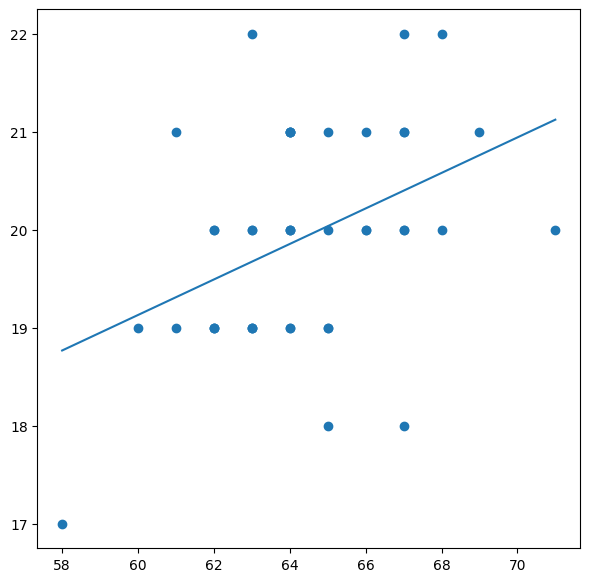

In [24]:
plt.figure(figsize= (7,7))
plt.plot([xmin, xmax], [ymin,ymax])
plt.scatter(X, y)

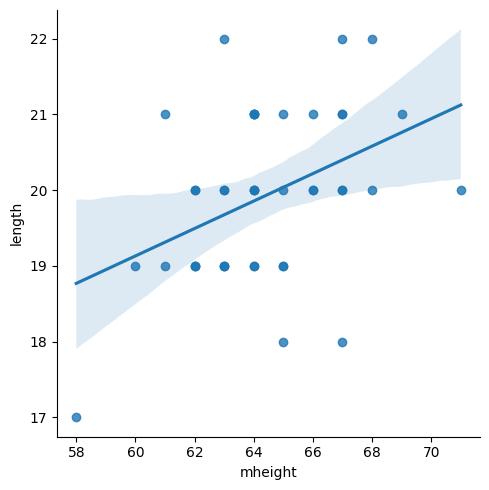

In [27]:
!pip install seaborn
import seaborn as sns

p = sns.lmplot(x='mheight', y='length', data=birth, height = 5) # The x and y variables are specified as keyword arguments. The dataset is passed as the data argument.